In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

### Адаптировать задачу из предыдущего раздела (УМО II) для случая, когда параметр 𝜆 неизвестен, и его нужно оценивать (даже в начале при отсутствии информации) по мере поступления новой информации (с помощью байесовской оценки). В качестве априорного распределения на 𝜆 возьмите сопряженное к экспоненциальному. Выберите параметры сопряженного распределения и объясните свой выбор. Сделайте выводы. Данные те же, что и в задаче из предыдущего раздела. Обратите внимание на изменение формата вывода программы.

Новый формат вывода программы:

время \t значение_у.м.о - для значении времени от 0 до 60 включительно.

время \t break - для времени поломки

Колонка времени должна быть упорядочена по возрастанию.

In [11]:
f = open('servers.txt', 'r')
data = np.array([])
for s in f:
    data = np.append(data, float(s))
f.close()

true_lambda = data[0]
data = data[1:]
print 'data.shape:', data.shape
print 'lambda:', true_lambda
t0 = 1
t = 60

data.shape: (15,)
lambda: 0.362


### $  N_{t}-N_{s} \ \sim \ Pois(\lambda \cdot (t-s))   $
### $ E(N_{t}-N_{s})\ =\ \lambda \cdot (t-s) $
### $ N_{t}-N_{s}\ независима\ с\ N_{s} \rightarrow\\ E(N_{t}-N_{s}|N_{s}) = E(N_{t}-N_{s}) $
### $ E(N_{t}|N_{s}) = E(N_{t}-N_{s}|N_{s}) + E(N_{s}|N_{s})\\ = \lambda \cdot (t-s)\ +\ N_{s} $

Посмотрим на Г($\alpha, \beta$)

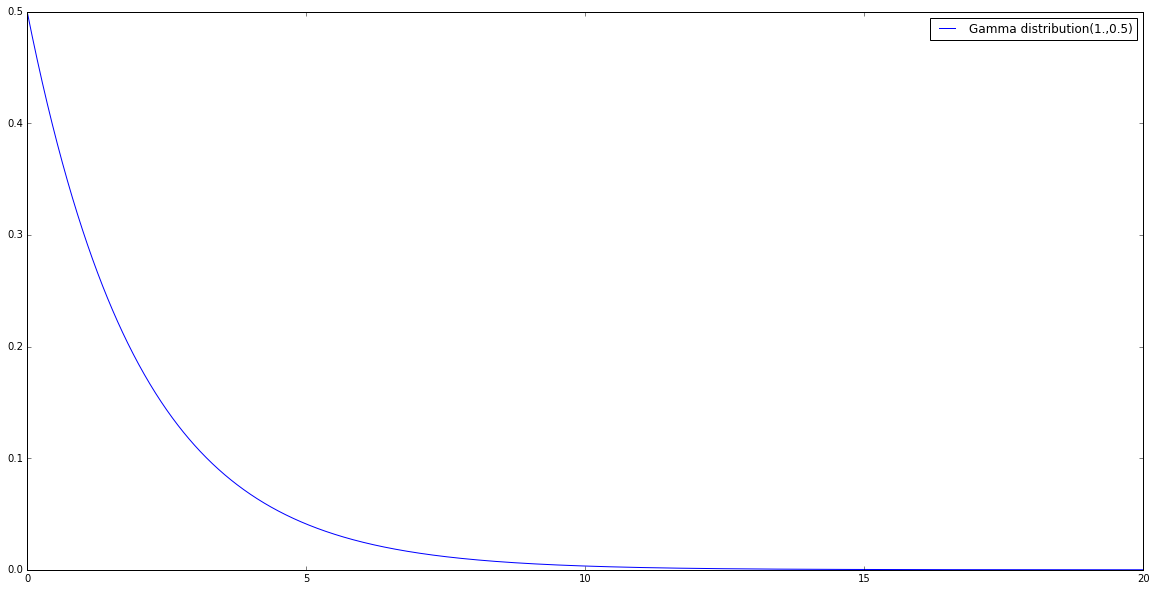

In [12]:
alpha, beta = 1., .5

X = np.arange(0., 20., .01)
plt.figure(figsize=(20, 10))
plt.plot(X, sts.gamma.pdf(X, alpha, scale=1./beta), label='Gamma distribution(1.,0.5)')
plt.legend()

Сопряженное к экспоненциальному - гамма. 

$\lambda^* = \frac{alpha + n - 1}{beta + \Sigma X_i}$

Не имеем информации о распределении $\lambda$, а при $\alpha > 1$ более вероятна окрестность какого-то числа.
$\rightarrow \alpha = 1$

$\beta$ отвечает за плавность графика плотности, нам нужен плавный, но не слишком: $\rightarrow \beta = 0.5$

In [13]:
log = [(t, 1) for t in data] + [(t, 0) for t in range(61)] 
log.sort()

In [14]:
X = []
lambda_errors = []

for entry in log:
    s = entry[0]
    if entry[1] == 1:
        # поломка
        print ('%.3f\tbreak' % s)
        X.append(s - np.sum(X))
    else:
        estimated_lambda = (alpha + len(X)*1. - 1.) / (beta + np.sum(X)*1.)
        lambda_errors.append(np.abs(true_lambda-estimated_lambda))
        print ('%.3f\t%.3f' % (s, estimated_lambda * (t - s) + len(X)*1.))

0.000	0.000
1.000	0.000
2.000	0.000
3.000	0.000
3.367	break
4.000	15.482
5.000	15.223
6.000	14.964
7.000	14.706
8.000	14.447
9.000	14.189
10.000	13.930
10.144	break
11.000	11.207
12.000	11.019
13.000	10.831
13.410	break
14.000	12.921
14.602	break
15.000	15.919
16.000	15.654
17.000	15.389
18.000	15.124
19.000	14.859
20.000	14.595
21.000	14.330
22.000	14.065
22.952	break
23.000	12.888
23.522	break
24.000	14.992
25.000	14.742
26.000	14.492
27.000	14.242
28.000	13.993
28.854	break
29.000	14.393
30.000	14.154
31.000	13.916
32.000	13.677
33.000	13.439
34.000	13.200
35.000	12.962
36.000	12.723
37.000	12.485
38.000	12.246
39.000	12.008
40.000	11.769
40.808	break
41.000	11.680
41.484	break
42.000	12.859
43.000	12.644
43.059	break
43.787	break
44.000	14.974
44.818	break
45.000	15.972
45.857	break
46.000	16.926
47.000	16.646
48.000	16.365
49.000	16.085
50.000	15.804
51.000	15.524
52.000	15.243
52.092	break
53.000	15.863
54.000	15.597
55.000	15.331
56.000	15.065
56.937	break
57.000	15.783
58.000	1

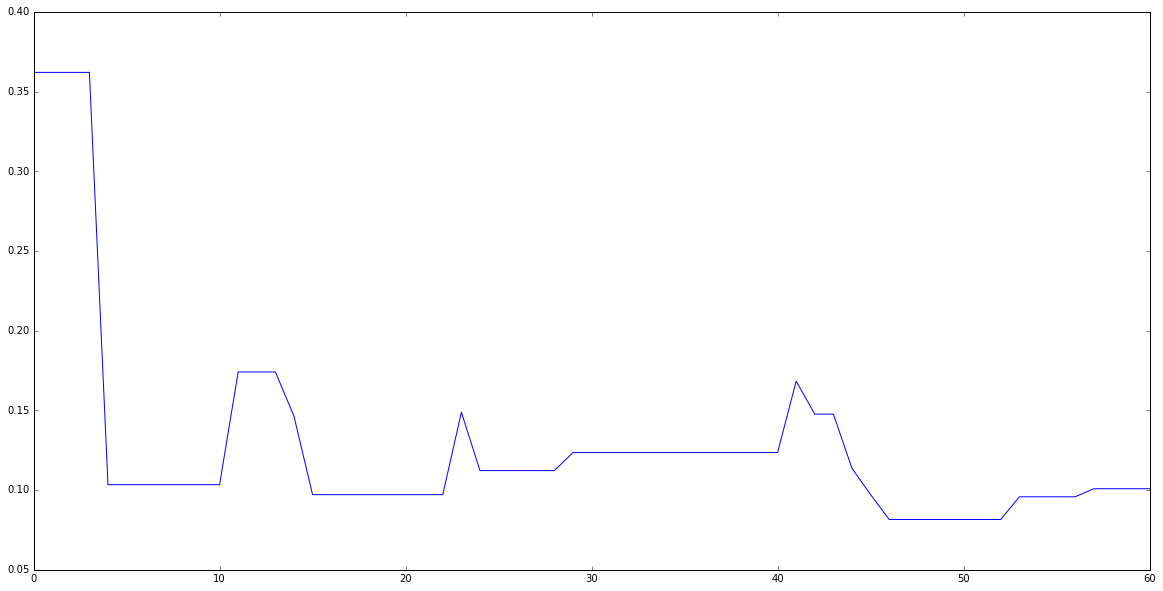

In [15]:
plt.figure(figsize=(20,10))
plt.plot(range(61), lambda_errors)